In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import StrMethodFormatter
from pygmo import *
import numpy as np
import pareto
import math

In [2]:
datasets = ['ft', 'ml100k', 'ml1m']

In [3]:
datasets_names = {
    'ml100k': 'MovieLens 100K',
    'ml1m': 'MovieLens 1M',
    'ft': 'FilmTrust'
}

## Jenetics search

In [4]:
jenetics_no_recklessness_dfs = {}
for dataset in datasets:
    jenetics_no_recklessness_dfs[dataset] = pd.read_csv('./results/' + dataset +'-jenetic-search-recklessness-no.csv', sep=';')

In [5]:
jenetics_recklessness_dfs = {}
for dataset in datasets:
    jenetics_recklessness_dfs[dataset] = pd.read_csv('./results/' + dataset +'-jenetic-search-recklessness-yes.csv', sep=';')


<ipython-input-6-1df3f37d576c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recklessness_last['is_pareto_front'] = recklessness_last.apply(is_pareto_front_r, axis = 1)
<ipython-input-6-1df3f37d576c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_recklessness_last['is_pareto_front'] = no_recklessness_last.apply(is_pareto_front_nr, axis = 1)
<ipython-input-6-1df3f37d576c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

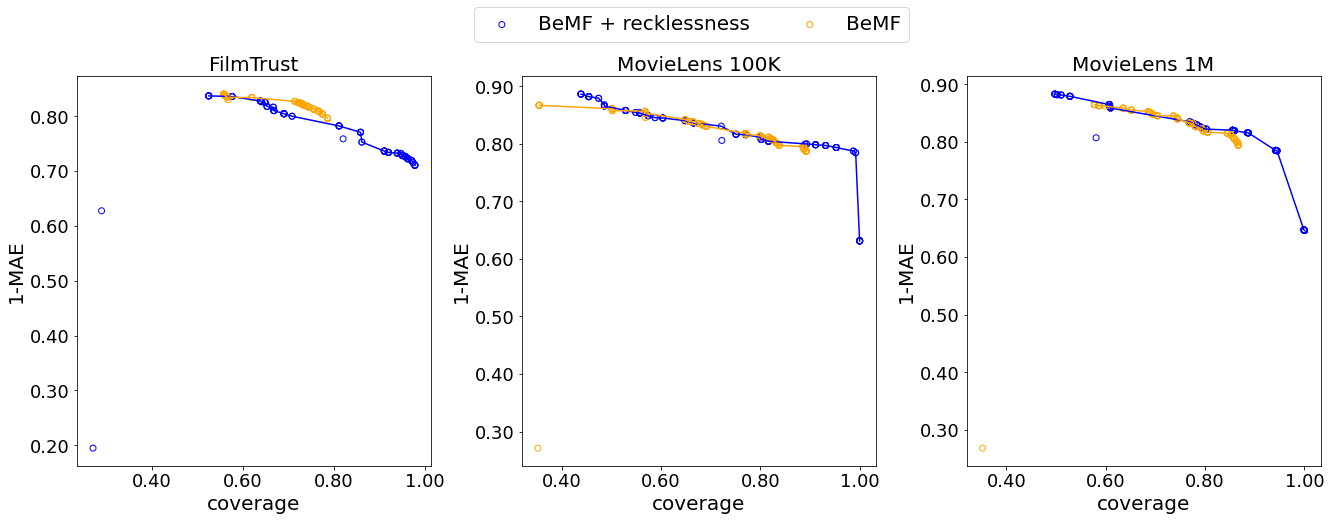

In [6]:
n_cols = len(datasets)
fig, axs = plt.subplots(1, n_cols, figsize=(6*n_cols, 6))
fig.tight_layout(h_pad=6, w_pad=6)

lines = []

for i, dataset in enumerate(datasets):

    # process results with recklessness
    jenetics_recklessness_df = jenetics_recklessness_dfs[dataset]
    recklessness_last = jenetics_recklessness_df[(jenetics_recklessness_df['generation']==150) & (jenetics_recklessness_df['cumulativeCoverage']>0)]

    def is_pareto_front_r(row):
        for i in range(len(recklessness_last)):
            i_row = recklessness_last.iloc[i]
            if i_row['cumulativeMAE'] > row['cumulativeMAE'] and i_row['cumulativeCoverage'] > row['cumulativeCoverage']:
                return False
        return True

    recklessness_last['is_pareto_front'] = recklessness_last.apply(is_pareto_front_r, axis = 1)

    # process results without recklessness
    jenetics_no_recklessness_df = jenetics_no_recklessness_dfs[dataset]
    no_recklessness_last = jenetics_no_recklessness_df[(jenetics_no_recklessness_df['generation']==150) & (jenetics_no_recklessness_df['cumulativeCoverage']>0)]

    def is_pareto_front_nr(row):
        for i in range(len(no_recklessness_last)):
            i_row = no_recklessness_last.iloc[i]
            if i_row['cumulativeMAE'] > row['cumulativeMAE'] and i_row['cumulativeCoverage'] > row['cumulativeCoverage']:
                return False
        return True

    no_recklessness_last['is_pareto_front'] = no_recklessness_last.apply(is_pareto_front_nr, axis = 1)

    # plot results
    axs[i].xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    axs[i].yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

    recklessness_yes = axs[i].scatter(recklessness_last['cumulativeCoverage'], recklessness_last['cumulativeMAE'], facecolors='none', edgecolors='blue')
    recklessness_no = axs[i].scatter(no_recklessness_last['cumulativeCoverage'], no_recklessness_last['cumulativeMAE'], facecolors='none', edgecolors='orange')
    lines = [recklessness_yes, recklessness_no]
    
    recklessness_pareto = recklessness_last[recklessness_last['is_pareto_front']].sort_values('cumulativeCoverage')
    axs[i].plot(recklessness_pareto['cumulativeCoverage'], recklessness_pareto['cumulativeMAE'], color='blue')

    no_recklessness_pareto = no_recklessness_last[no_recklessness_last['is_pareto_front']].sort_values('cumulativeCoverage')
    axs[i].plot(no_recklessness_pareto['cumulativeCoverage'], no_recklessness_pareto['cumulativeMAE'], color='orange')

    axs[i].set_xlabel('coverage', fontsize=20)
    axs[i].set_ylabel('1-MAE', fontsize=20)
    axs[i].set_title(datasets_names[dataset], fontsize=20)

    axs[i].tick_params(axis='both', which='major', labelsize=18)


labels = ['BeMF + recklessness', 'BeMF']
plt.figlegend(lines, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, 1.15), fontsize=20)

plt.savefig('figures/training-error-pareto-front.png', dpi=300, bbox_inches='tight')


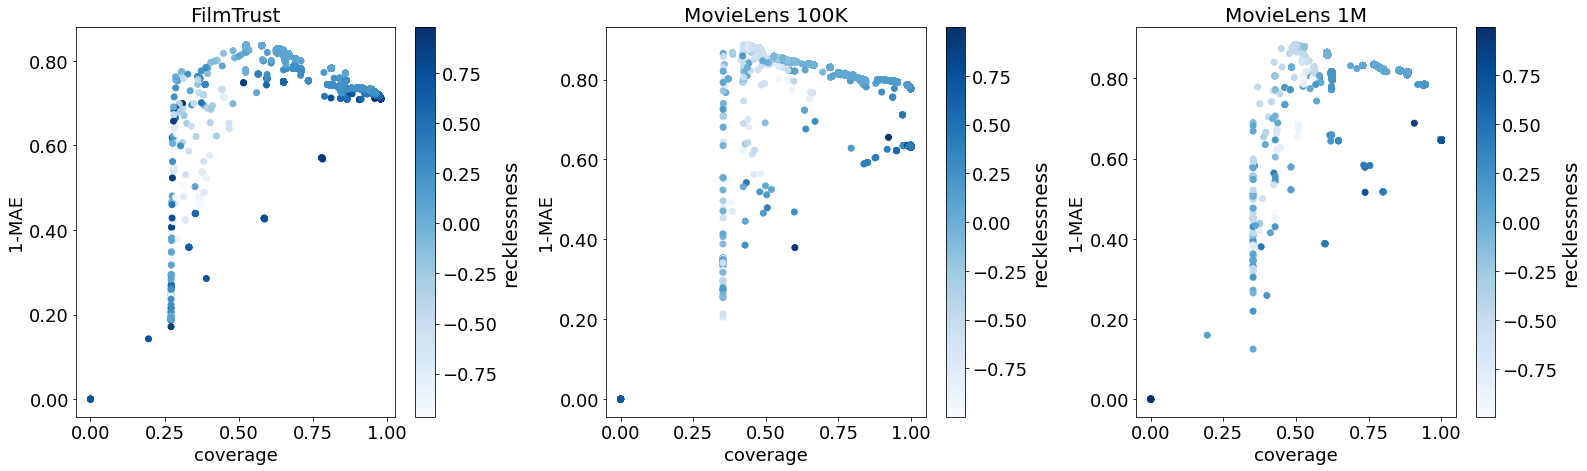

In [7]:
n_cols = len(datasets)
fig, axs = plt.subplots(1, n_cols, figsize=(7*n_cols, 6))
fig.tight_layout(h_pad=4, w_pad=10)

for i, dataset in enumerate(datasets):
    jenetics_recklessness_df = jenetics_recklessness_dfs[dataset]
    im = axs[i].scatter(jenetics_recklessness_df['cumulativeCoverage'], jenetics_recklessness_df['cumulativeMAE'], c=jenetics_recklessness_df['recklessness'], cmap='Blues')
    
    axs[i].xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    axs[i].yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    
    axs[i].set_xlabel('coverage', fontsize=18)
    axs[i].set_ylabel('1-MAE', fontsize=18)
    axs[i].set_title(datasets_names[dataset], fontsize=20)

    axs[i].tick_params(axis='both', which='major', labelsize=18)

    cbar = plt.colorbar(im, ax=axs[i])
    cbar.set_label('recklessness', fontsize=20)
    cbar.ax.tick_params(labelsize=18)

plt.savefig('figures/recklessness-value.png', dpi=300, bbox_inches='tight')


## Test split error

In [8]:
pmf_error = {
    'ml100k': 0.8145511777115231,
    'ml1m': 0.8217556524620753,
    'ft': 0.7841889363378948
}

In [9]:
mlp_error = {
    'ml100k': 0.7676935605695441,
    'ml1m': 0.8173338396534413,
    'ft': 0.7977525019182942
}

In [10]:
dfs = {}

def is_pareto_front(row, df):
    aux_df = df[(df['recklessness'] == row.recklessness) & (df['reliability'] == row.reliability)]

    for i in range(len(aux_df)):
        i_row = aux_df.iloc[i]
        if (i_row['1-mae'] > row['1-mae'] and i_row['coverage'] > row['coverage']) or (i_row['1-mae'] == row['1-mae'] and i_row['coverage'] > row['coverage']) or (i_row['1-mae'] > row['1-mae'] and i_row['coverage'] == row['coverage']):
            return False
    
    return True

for dataset in datasets:
    dfs[dataset] = pd.read_csv('results/' + dataset + '-test-split-error.csv', sep=';')
    dfs[dataset] = dfs[dataset].dropna()
    
    dfs[dataset]['is_pareto_front'] = dfs[dataset].apply(is_pareto_front, args=(dfs[dataset],), axis = 1)

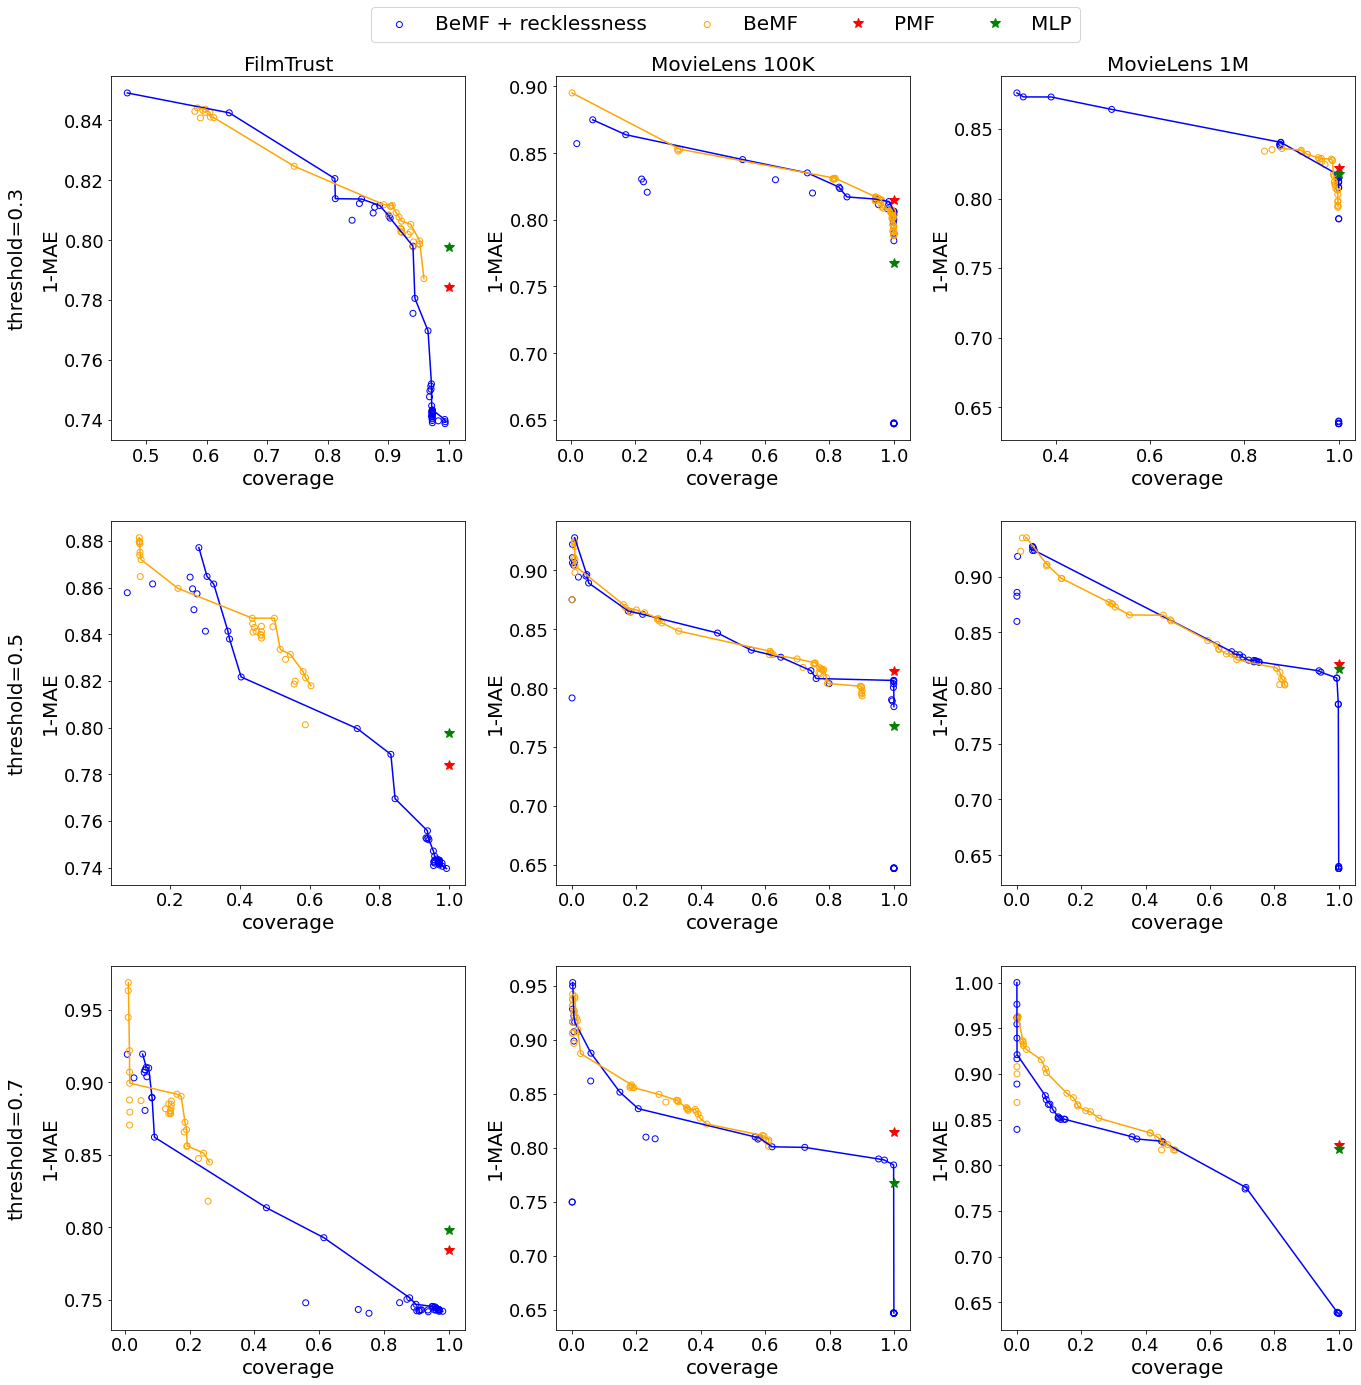

In [11]:
import matplotlib.pyplot as plt

rel_values = [0.30, 0.50, 0.70]

n_rows = len(rel_values)
n_cols = len(datasets)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 6*n_rows))
fig.tight_layout(h_pad=6, w_pad=6)

lines = []

for j, dataset in enumerate(datasets):

    df = dfs[dataset]

    for i, rel_value in enumerate(rel_values):

        axs[i,j].set_xlabel('coverage', fontsize=20)
        
        if j==0:
            axs[i,j].set_ylabel('threshold=' + str(rel_value) + '\n1-MAE', fontsize=20, linespacing=2.0)
        else:
            axs[i,j].set_ylabel('1-MAE', fontsize=20)
            
        if i==0:
            axs[i,j].set_title(datasets_names[dataset], fontsize=20)

        axs[i,j].tick_params(axis='both', which='major', labelsize=18)

        rel_df = df[(df['reliability'] == rel_value) & (df['recklessness'] == 'yes')]   
        recklessness_yes = axs[i,j].scatter(rel_df['coverage'], rel_df['1-mae'], facecolors='none', edgecolors='blue', label='yes')

        rel_pareto_front = rel_df[rel_df['is_pareto_front']].sort_values('coverage', ascending=False)
        axs[i,j].plot(rel_pareto_front['coverage'], rel_pareto_front['1-mae'], color='blue')

        not_rel_df = df[(df['reliability'] == rel_value) & (df['recklessness'] == 'no')]   
        recklessness_no = axs[i,j].scatter(not_rel_df['coverage'], not_rel_df['1-mae'], facecolors='none', edgecolors='orange', label='no')

        not_rel_pareto_front = not_rel_df[not_rel_df['is_pareto_front']].sort_values('coverage', ascending=False)
        axs[i,j].plot(not_rel_pareto_front['coverage'], not_rel_pareto_front['1-mae'], color='orange')

        pmf, = axs[i,j].plot(1, pmf_error[dataset], 'r*', markersize=10, label='pmf') 
        mlp, = axs[i,j].plot(1, mlp_error[dataset], 'g*', markersize=10, label='mlp')

        lines = [recklessness_yes, recklessness_no, pmf, mlp]

labels = ['BeMF + recklessness', 'BeMF', 'PMF', 'MLP']
plt.figlegend(lines, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, 1.05), fontsize=20)

plt.savefig('figures/test-error.png', dpi=300, bbox_inches='tight')

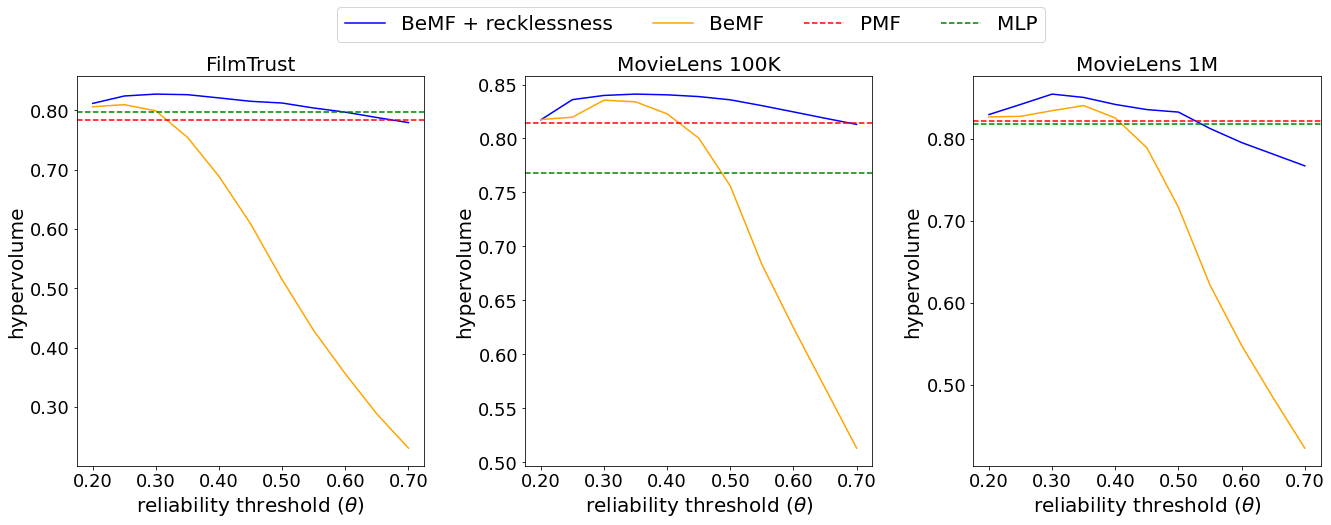

In [12]:
reliabilities = [0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70]

n_cols = len(datasets)
fig, axs = plt.subplots(1, n_cols, figsize=(6*n_cols, 6))
fig.tight_layout(h_pad=6, w_pad=7)

lines = []

for i, dataset in enumerate(datasets):

    df = dfs[dataset]
    hv_df = pd.DataFrame(columns=['reliability', 'recklessness', 'hv'])
    
    for reliability in reliabilities:
        for recklessness in ['yes', 'no']:

            aux_df = df[(df['reliability'] == reliability) & (df['recklessness'] == recklessness) & (df['is_pareto_front'])]

            hv = hypervolume(1 - aux_df[['coverage', '1-mae']])

            hv_df = hv_df.append({
                'reliability': reliability,
                'recklessness': recklessness,
                'hv': hv.compute([1,1])
            }, ignore_index = True)
    
    recklessness_yes, = axs[i].plot(hv_df[hv_df['recklessness']=='yes']['reliability'], hv_df[hv_df['recklessness']=='yes']['hv'], color='blue')
    recklessness_no, = axs[i].plot(hv_df[hv_df['recklessness']=='no']['reliability'], hv_df[hv_df['recklessness']=='no']['hv'], color='orange')

    axs[i].set_xlabel(r'reliability threshold ($\theta$)', fontsize=20)
    axs[i].set_ylabel('hypervolume', fontsize=20)
    axs[i].set_title(datasets_names[dataset], fontsize=20)

    axs[i].tick_params(axis='both', which='major', labelsize=18)
    
    axs[i].xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    axs[i].yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

    pmf_hv = hypervolume([[0, 1-pmf_error[dataset]]]).compute([1,1])
    pmf = axs[i].axhline(y=pmf_hv, color='red', linestyle='--', label='pmf')

    mlp_hv = hypervolume([[0, 1-mlp_error[dataset]]]).compute([1,1])
    mlp = axs[i].axhline(y=mlp_hv, color='green', linestyle='--', label='mlp')

    lines = [recklessness_yes, recklessness_no, pmf, mlp]
    
labels = ['BeMF + recklessness', 'BeMF', 'PMF', 'MLP']
plt.figlegend(lines, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, 1.15), fontsize=20)
    
plt.savefig('figures/hv.png', dpi=300, bbox_inches='tight')